# Wrangle and Analyze Data

# introduction :

Hello , I'm Yousef almutairi , and i will be working on this project reqiured for ND certficiation from udacity program , 

i will try my best!,
#### I applied for Twitter Developer Acoount , but unfortunately my application was not abbroved

1 - as for the data gathering i downloaded tha files from udacity project home page , 
  - tweet_json.txt
  - image_predictions.tsv

In [2]:
import pandas as pd 
import numpy as np
import requests 
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data gathering 

In [4]:
# reading the provided file from udacity project home page , and save it in Twitter_Arc
twitter_Arc = pd.read_csv('twitter_archive_enhanced.csv')

In [5]:
# checking the content of the recently created dataframe
twitter_Arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
# downoloading image-predictions file using the provided url in udacity
Request_URL = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
Req_Response = requests.get(Request_URL)

# save .tsv to file
with open("image-predictions.tsv", mode = 'wb') as file :
    file.write(Req_Response.content)
    

In [7]:
# reading image-predictions file and saving it  
Img_Pred = pd.read_csv('image-predictions.tsv', sep = '\t')

In [8]:
#checking the content of the recently created dataframe
Img_Pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
# read JSON content as Pandas DataFrame
tweets_json = pd.read_json('tweet_json.txt', lines= True, encoding = 'utf-8')

In [13]:
# select specific columns to keep in the data frame
tweets_json = tweets_json.loc[:, ['id','favorite_count','retweet_count']]

In [14]:
# checking the structure of the resulted DataFrame
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Data Assessing

In [16]:
twitter_Arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [17]:
Img_Pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
tweets_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [19]:
#returning a random sample of 20 rows from the table 
twitter_Arc.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
157,861288531465048066,NaN,NaN,2017-05-07 18:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861288531...,13,10,None,None,None,None,None
486,814530161257443328,NaN,NaN,2016-12-29 17:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alf. Someone just rubbed a balloon on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814530161...,12,10,Alf,None,None,None,None
292,838083903487373313,NaN,NaN,2017-03-04 17:49:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's puppears to be rare as al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838083903...,13,10,Daisy,None,None,None,None
1425,697943111201378304,NaN,NaN,2016-02-12 00:39:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She goes door to door trying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697943111...,10,10,Cassie,None,None,None,None
941,752932432744185856,NaN,NaN,2016-07-12 18:27:35 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Carl. He's very powerful. 12/10 don't ...,NaN,NaN,NaN,https://vine.co/v/OEppMFbejFz,12,10,Carl,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
969,750132105863102464,NaN,NaN,2016-07-05 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stewie. He will roundhouse kick anyone...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750132105...,11,10,Stewie,None,None,None,None
2060,671182547775299584,NaN,NaN,2015-11-30 04:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup holds the secrets of the universe in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671182547...,12,10,None,None,None,None,None
734,781251288990355457,NaN,NaN,2016-09-28 21:56:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He just got yelled at for goin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781251288...,11,10,Oakley,None,None,None,None
971,750101899009982464,NaN,NaN,2016-07-04 23:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lilah. She agreed on one quick pic. Now s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750101899...,11,10,Lilah,None,None,None,None


In [20]:
twitter_Arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
# generates descriptive stats for the rating_numerator column
twitter_Arc.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [22]:
# sort the values of the rating_numerator column descending  
twitter_Arc.rating_numerator.sort_values(ascending=False)

979     1776
313      960
189      666
188      420
2074     420
        ... 
2338       1
2261       1
2335       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [17]:
# checking the value count of rating_numerator column 
twitter_arch.rating_numerator.value_counts(ascending = True)

204       1
121       1
99        1
45        1
27        1
17        1
1776      1
960       1
666       1
143       1
182       1
144       1
88        1
84        1
165       1
60        1
50        1
44        1
26        1
24        1
20        1
80        1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [23]:
# generates descriptive stats for the rating_denominator column
twitter_Arc.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [24]:
# sort the values of the rating_denominator column descending  
twitter_Arc.rating_denominator.sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
       ... 
1575     10
1576     10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

In [26]:
# checking the records where the rating_denominator is 0 
twitter_Arc[twitter_Arc.rating_denominator == 0 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [27]:
# checking the value counts of denomerator column 
twitter_Arc.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
# returning all the rows that has null value in expanded_urls column
twitter_Arc[twitter_Arc.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [29]:
# checking for number of null value in 
sum(twitter_Arc.retweeted_status_id.isnull())

2175

In [30]:
Img_Pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
# checking the existance of dupliacted values in tweet_id column
Img_Pred[Img_Pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [32]:
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [33]:
tweets_json.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

In [34]:
tweets_json.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [35]:
# checking the existance of dupliacted values in id column
tweets_json[tweets_json.id.duplicated()]

,id,favorite_count,retweet_count


In [36]:
# checking the unique values of the source colummn
twitter_Arc.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

# Accuracy & quality :

#### Twitter_Arc DataFrame :
- Missing values at most of the cells in ('in_reply_to_status_id', 'in_reply_to_user_id') columns Are 78 instead of 2356
- Missing values at most of the cells in ('retweeted_status_id', 'retweeted_status_user_id' , 'retweeted_status_timestamp') columns Are 181 instead of 2356
- We are only going to use ORIGINAL tweets of dog rating , we will not use nethier retweets or reply tweet as an original tweet .
- We will use only ORIGINAL tweets of dog rating that held images , we will not use tweets without images .
- wrong datatypes ('timestamp' , 'retweeted_status_timestamp')
- we will change 'tweet_id' datatype to Object for a better quality .
- 'rating_denominator' column values should be of 10 .
- Inaccurate values in 'rating_numerator' colmun , some ratings are not out of 10 - rating_denominator .
- missvalues of the nulls in columns ('doggo','pupper','floofer','puppo') nulls are presented as "None" .
- Content of ('source') column is too long thus its can not be analyzed easily .
- Irregular and illogical values in 'name' column . 
- some values in 'name' column are in LOWERCASE .
- missvalues of the nulls in column ('name') nulls are presented as "None".
- underscriptive label for the 'name' column.
- 'rating_numerator' for the 'tweet_id' = 786709082849828864 equals 9.75 instead of 75 .



##### Img_Pred
- "True" and "False" values in the (`p1_dog`, `p2_dog`, `p3_dog`) columns are not handy.
- Undescriptive columns' labels (`p1`,`p2`,`p3`,`p1_conf`,`p2_conf`,`p3_conf`,`p1_dog`,`p2_dog`,`p3_dog`).
- some images are not dog images , and we are only intrested in dogs rating .
- changing datatype of 'tweet_id' to Object for a better quality.

##### tweets_json
- 'tweet_id' as a label instead of 'id'.
- Changing 'id' datatype to Object for a better quality .

#### Tidiness
- (`doggo`,`floofer`,`pupper`,`puppo`) columns values should be represented in one column called 'dog_stage' with a 'category' datatype.
- combine our main dataset with 'tweet_json' and 'img_predict' tables.
- 'rating_numerator' and 'rating_denominator' colmuns should be in one main column which will be called 'rating_out_of_10'.

## Cleaning Data

In [39]:
twitter_Arc_clean = twitter_Arc.copy()
Img_Pred_clean = Img_Pred.copy()
tweets_json_clean = tweets_json.copy()

### Missing Data

In [40]:
twitter_Arc_clean = twitter_Arc_clean[twitter_Arc_clean.retweeted_status_id.isnull()]
twitter_Arc_clean = twitter_Arc_clean[twitter_Arc_clean.in_reply_to_status_id.isnull()]

#dropping `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` 
#and `retweeted_status_timestamp` columns 
twitter_Arc_clean = twitter_Arc_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 
                                              'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

In [41]:
#Test
twitter_Arc_clean.shape

(2097, 12)

In [42]:
#checking that columns were successfully dropped from the data frame
twitter_Arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [43]:
twitter_Arc_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Data Tidiness 

In [47]:
# get the index of `puppo` column
twitter_Arc_clean.columns.get_loc('puppo')

11

In [48]:
# get the index of `doggo` column
twitter_Arc_clean.columns.get_loc('doggo')

8

In [49]:
#replacing "None" with np.nan
twitter_Arc_clean['doggo'].replace(to_replace = 'None', value = np.nan, inplace= True)
twitter_Arc_clean['floofer'].replace(to_replace = 'None', value = np.nan, inplace= True)
twitter_Arc_clean['pupper'].replace(to_replace = 'None', value = np.nan, inplace= True)
twitter_Arc_clean['puppo'].replace(to_replace = 'None', value = np.nan, inplace= True)

# create a new column "dog_stage" and assign it the values of the four columns
twitter_Arc_clean['dog_stage'] = twitter_Arc_clean[twitter_Arc_clean.columns[8:12]].apply(lambda x: ','.join(x.dropna().astype(str)),axis = 1)


# change thedatatype of the `dog_stage` column to "category" datatype
twitter_Arc_clean['dog_stage'] = twitter_Arc_clean['dog_stage'].astype('category')

# dropping the four columns
twitter_Arc_clean = twitter_Arc_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

In [51]:
#Test
twitter_Arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2097 non-null   int64   
 1   timestamp           2097 non-null   object  
 2   source              2097 non-null   object  
 3   text                2097 non-null   object  
 4   expanded_urls       2094 non-null   object  
 5   rating_numerator    2097 non-null   int64   
 6   rating_denominator  2097 non-null   int64   
 7   name                2097 non-null   object  
 8   dog_stage           2097 non-null   category
dtypes: category(1), int64(3), object(5)
memory usage: 149.9+ KB


In [52]:
twitter_Arc_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
209,852226086759018497,2017-04-12 18:25:07 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet General. He wasn't content with the quali...,https://twitter.com/dog_rates/status/852226086...,14,10,General,
1652,683481228088049664,2016-01-03 02:53:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,https://twitter.com/dog_rates/status/683481228...,11,10,Banjo,pupper
2235,668171859951755264,2015-11-21 20:59:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Trans Siberian Kellogg named Alfonso...,https://twitter.com/dog_rates/status/668171859...,7,10,a,
1949,673689733134946305,2015-12-07 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a blast and remember tomorr...,https://twitter.com/dog_rates/status/673689733...,11,10,None,
164,860184849394610176,2017-05-04 17:30:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have perhaps the wisest dog of all. Ab...,https://twitter.com/dog_rates/status/860184849...,14,10,None,
1928,674045139690631169,2015-12-08 01:57:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Herd of wild dogs here. Not sure what they're ...,https://twitter.com/dog_rates/status/674045139...,3,10,None,
1522,690649993829576704,2016-01-22 21:39:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hazel. She's a gymnast. Training hard ...,https://twitter.com/dog_rates/status/690649993...,11,10,Hazel,
1860,675489971617296384,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,10,10,None,
1845,675845657354215424,2015-12-13 01:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pepper. She's not fully comfortable ri...,https://twitter.com/dog_rates/status/675845657...,10,10,Pepper,pupper
730,781661882474196992,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,


In [53]:
#change the datatype of `tweet_id` column in `twitter_Arc_clean` table
twitter_Arc_clean['tweet_id'] = twitter_Arc_clean['tweet_id'].astype('object')
tweets_json_clean['id'] = tweets_json_clean['id'].astype('object')

#rename `id` column to "tweet_id" 
tweets_json_clean.columns = ['tweet_id','favorite_count','retweet_count']

In [54]:
#merge `twitter_arch` and `tweet_json` tables 
twitter_Arc_clean = pd.merge(twitter_Arc_clean, tweets_json_clean,
                       on='tweet_id', how='left')

In [55]:
#test
twitter_Arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2097 non-null   object  
 1   timestamp           2097 non-null   object  
 2   source              2097 non-null   object  
 3   text                2097 non-null   object  
 4   expanded_urls       2094 non-null   object  
 5   rating_numerator    2097 non-null   int64   
 6   rating_denominator  2097 non-null   int64   
 7   name                2097 non-null   object  
 8   dog_stage           2097 non-null   category
 9   favorite_count      2097 non-null   int64   
 10  retweet_count       2097 non-null   int64   
dtypes: category(1), int64(4), object(6)
memory usage: 182.6+ KB


In [56]:
# combine 'img_predict` table with our main dataset `twitter_Arc_clean` to form a master dataset called 'Master_ds'
Master_ds = pd.merge(twitter_Arc_clean, Img_Pred_clean,
                       on='tweet_id', how='inner')

In [57]:
#Test
Master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1971 non-null   object  
 1   timestamp           1971 non-null   object  
 2   source              1971 non-null   object  
 3   text                1971 non-null   object  
 4   expanded_urls       1971 non-null   object  
 5   rating_numerator    1971 non-null   int64   
 6   rating_denominator  1971 non-null   int64   
 7   name                1971 non-null   object  
 8   dog_stage           1971 non-null   category
 9   favorite_count      1971 non-null   int64   
 10  retweet_count       1971 non-null   int64   
 11  jpg_url             1971 non-null   object  
 12  img_num             1971 non-null   int64   
 13  p1                  1971 non-null   object  
 14  p1_conf             1971 non-null   float64 
 15  p1_dog              1971 non-null   bo

In [58]:
#results : should be no records to be displayed 
Master_ds[Master_ds.jpg_url.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [59]:
# replacing the `rating_numerator` for the `tweet_id` = 786709082849828864  with  9.75 
Master_ds['rating_numerator'].replace(to_replace = 75, value = 9.75, inplace= True)

In [60]:
# dividing the `rating_numerator` value by the `rating_denominator` value
Master_ds['rating_numerator'] = Master_ds['rating_numerator']/Master_ds['rating_denominator']

# multiplying the result by 10 
Master_ds['rating_numerator'] = Master_ds['rating_numerator'].mul(10)

In [61]:
# changing the datatype of the column to int64(integer)
Master_ds['rating_numerator'] = Master_ds['rating_numerator'].astype(int)

# rename the `rating_numerator` column to `rating_out_of_10`
Master_ds = Master_ds.rename(columns={"rating_numerator": "rating_out_of_10"}) 

# drop the rating_denominator column
Master_ds = Master_ds.drop('rating_denominator', axis = 1)

In [64]:
#Test 
Master_ds[Master_ds['rating_out_of_10'] == 75]

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,dog_stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [65]:
# checking the name and position of the rationg column
Master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tweet_id          1971 non-null   object  
 1   timestamp         1971 non-null   object  
 2   source            1971 non-null   object  
 3   text              1971 non-null   object  
 4   expanded_urls     1971 non-null   object  
 5   rating_out_of_10  1971 non-null   int32   
 6   name              1971 non-null   object  
 7   dog_stage         1971 non-null   category
 8   favorite_count    1971 non-null   int64   
 9   retweet_count     1971 non-null   int64   
 10  jpg_url           1971 non-null   object  
 11  img_num           1971 non-null   int64   
 12  p1                1971 non-null   object  
 13  p1_conf           1971 non-null   float64 
 14  p1_dog            1971 non-null   bool    
 15  p2                1971 non-null   object  
 16  p2_conf           1971 n

### Quality

In [66]:
# retrieving the four source types 
Master_ds.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [67]:
#changing the 'source' columns values to a shorter one, in order to easier usage to analyze 
     
Master_ds['source'] = Master_ds['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                            'Twitter for iphone')
Master_ds['source'] = Master_ds['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                             'Twitter Web Client')
Master_ds['source'] = Master_ds['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                             'TweetDeck')

# changing the type of the `source` column to "Category" Datatype
Master_ds['source'] = Master_ds['source'].astype('category')

In [68]:
#Test
Master_ds.source.value_counts()

Twitter for iphone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [72]:
#change the datatype of the `p1_dog` column to integer Datatype
Master_ds['p1_dog'] = Master_ds['p1_dog'].astype(int)

In [73]:
#change the datatype of the `p2_dog` column to integer Datatype
Master_ds['p2_dog'] = Master_ds['p2_dog'].astype(int)

In [74]:
#change the datatype of the `p3_dog` column to integer Datatype
Master_ds['p3_dog'] = Master_ds['p3_dog'].astype(int)

In [75]:
# create a new empty list and use for loop to assign it the sum values of 
# the (`p1_dog`, `p2_dog`, `p3_dog`) columns in each row
sum_px_dog= []
for index, row in Master_ds.iterrows():
    sum_px_dog.append(row.p1_dog + row.p2_dog +row.p3_dog)
    
# create a new column to hold the sum values "sum_px_dog"  and assign the values of the previously created list
Master_ds['sum_px_dog'] = sum_px_dog

# only keep the records,in `Master_ds` , that have a `sum_px_dog` value greater than or equal 1.
Master_ds = Master_ds[Master_ds['sum_px_dog'] >= 1 ]

# drop the `sum_px_dog` column
Master_ds = Master_ds.drop('sum_px_dog',axis = 1)

In [76]:
#Test
Master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 1970
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tweet_id          1666 non-null   object  
 1   timestamp         1666 non-null   object  
 2   source            1666 non-null   category
 3   text              1666 non-null   object  
 4   expanded_urls     1666 non-null   object  
 5   rating_out_of_10  1666 non-null   int32   
 6   name              1666 non-null   object  
 7   dog_stage         1666 non-null   category
 8   favorite_count    1666 non-null   int64   
 9   retweet_count     1666 non-null   int64   
 10  jpg_url           1666 non-null   object  
 11  img_num           1666 non-null   int64   
 12  p1                1666 non-null   object  
 13  p1_conf           1666 non-null   float64 
 14  p1_dog            1666 non-null   int32   
 15  p2                1666 non-null   object  
 16  p2_conf           1666 n

In [77]:
#chanigng the datatype of the `timestamp` column
Master_ds['timestamp'] = pd.to_datetime(Master_ds.timestamp)

In [78]:
#Test
Master_ds['timestamp'].sample()

833   2016-05-20 02:18:32+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [79]:
#confirm
Master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 1970
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1666 non-null   object             
 1   timestamp         1666 non-null   datetime64[ns, UTC]
 2   source            1666 non-null   category           
 3   text              1666 non-null   object             
 4   expanded_urls     1666 non-null   object             
 5   rating_out_of_10  1666 non-null   int32              
 6   name              1666 non-null   object             
 7   dog_stage         1666 non-null   category           
 8   favorite_count    1666 non-null   int64              
 9   retweet_count     1666 non-null   int64              
 10  jpg_url           1666 non-null   object             
 11  img_num           1666 non-null   int64              
 12  p1                1666 non-null   object             
 13  p1_

In [80]:
#replacing "None" and Irregular and unlogical values with np.nan
Master_ds['name'].replace(to_replace = ['None','a','the','an','o'], value = np.nan, inplace= True)

#Convert all the values in the `name` column to the title case 
Master_ds['name'] = Master_ds['name'].str.title()

In [84]:
# Test and confirm
Master_ds['name'].sample(20)

542                Mya
1833               NaN
165               Kyle
1057              Lucy
1086              Nala
1958               NaN
923               Toby
378                Ted
1305               NaN
1347               NaN
928     Michelangelope
802                NaN
852               Puff
256              Dutch
1169           Chester
553            Jeffrey
1132              Berb
185             Jarvis
1077              Kaia
168             Boomer
Name: name, dtype: object

In [85]:
# Rename the `name` column to `dog_name`
Master_ds = Master_ds.rename(columns={"name": "dog_name"}) 

In [86]:
#test & confirm
Master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 1970
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1666 non-null   object             
 1   timestamp         1666 non-null   datetime64[ns, UTC]
 2   source            1666 non-null   category           
 3   text              1666 non-null   object             
 4   expanded_urls     1666 non-null   object             
 5   rating_out_of_10  1666 non-null   int32              
 6   dog_name          1209 non-null   object             
 7   dog_stage         1666 non-null   category           
 8   favorite_count    1666 non-null   int64              
 9   retweet_count     1666 non-null   int64              
 10  jpg_url           1666 non-null   object             
 11  img_num           1666 non-null   int64              
 12  p1                1666 non-null   object             
 13  p1_

In [87]:
# Rename the columns' labels to more descriptive columns' labels
Master_ds = Master_ds.rename(columns={"p1": "predict_1","p1_conf":"predict_1_conf","p1_dog":"predict_1_dog",
                                                     "p2": "predict_2","p2_conf":"predict_2_conf","p2_dog":"predict_2_dog",
                                                     "p3": "predict_3","p3_conf":"predict_3_conf","p3_dog":"predict_3_dog"}) 

In [88]:
#Test & confirm
Master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 1970
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1666 non-null   object             
 1   timestamp         1666 non-null   datetime64[ns, UTC]
 2   source            1666 non-null   category           
 3   text              1666 non-null   object             
 4   expanded_urls     1666 non-null   object             
 5   rating_out_of_10  1666 non-null   int32              
 6   dog_name          1209 non-null   object             
 7   dog_stage         1666 non-null   category           
 8   favorite_count    1666 non-null   int64              
 9   retweet_count     1666 non-null   int64              
 10  jpg_url           1666 non-null   object             
 11  img_num           1666 non-null   int64              
 12  predict_1         1666 non-null   object             
 13  pre

## Confirmation of tidy Master dataset , final test 

In [89]:
#checking first few records
Master_ds.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,dog_name,dog_stage,favorite_count,retweet_count,...,img_num,predict_1,predict_1_conf,predict_1_dog,predict_2,predict_2_conf,predict_2_dog,predict_3,predict_3_conf,predict_3_dog
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,,33819,6514,...,1,Chihuahua,0.323581,1,Pekinese,0.090647,1,papillon,0.068957,1
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,,25461,4328,...,1,Chihuahua,0.716012,1,malamute,0.078253,1,kelpie,0.031379,1
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,,42908,8964,...,1,paper_towel,0.170278,0,Labrador_retriever,0.168086,1,spatula,0.040836,0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,,41048,9774,...,2,basset,0.555712,1,English_springer,0.225770,1,German_short-haired_pointer,0.175219,1
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,NaN,,20562,3261,...,1,Chesapeake_Bay_retriever,0.425595,1,Irish_terrier,0.116317,1,Indian_elephant,0.076902,0


## Store Data

In [90]:
# Storing the combined and cleaned data 
Master_ds.to_csv('twitter_archive_master.csv',encoding='utf-8')

# Visualization and Analysis

In [91]:
Master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 1970
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1666 non-null   object             
 1   timestamp         1666 non-null   datetime64[ns, UTC]
 2   source            1666 non-null   category           
 3   text              1666 non-null   object             
 4   expanded_urls     1666 non-null   object             
 5   rating_out_of_10  1666 non-null   int32              
 6   dog_name          1209 non-null   object             
 7   dog_stage         1666 non-null   category           
 8   favorite_count    1666 non-null   int64              
 9   retweet_count     1666 non-null   int64              
 10  jpg_url           1666 non-null   object             
 11  img_num           1666 non-null   int64              
 12  predict_1         1666 non-null   object             
 13  pre

## First Question :
#### Do Twitterers  Favorite three time as much as they retweet ?.

In [92]:
# get a summary statistics
Master_ds.describe(include = ['int'])

,rating_out_of_10,predict_1_dog,predict_2_dog,predict_3_dog
count,1666.000000,1666.000000,1666.000000,1666.000000
mean,10.838535,0.878151,0.888355,0.858944
std,1.962955,0.327209,0.315023,0.348184
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,1.000000,1.000000
50%,11.000000,1.000000,1.000000,1.000000
75%,12.000000,1.000000,1.000000,1.000000
max,34.000000,1.000000,1.000000,1.000000


In [97]:
# total favourites
sum(Master_ds.favorite_count)

15474115

In [94]:
# total retweets
sum(Master_ds.retweet_count)

4722160

the favorite_count mean is approximately 9288 favorites .
the favorite_count median is approximately 4464 favorites .
the retweet_count mean is approximately 2834 retweets .
the retweet_count median is approximately 1440.5 .

### observasions :
they are having greater means than medians and also their standard deviaton is also geater than mean.

### Thoughts :
i think that this is an indicator of the favorite_count and the retweet_count are skewed in a sginficant way .


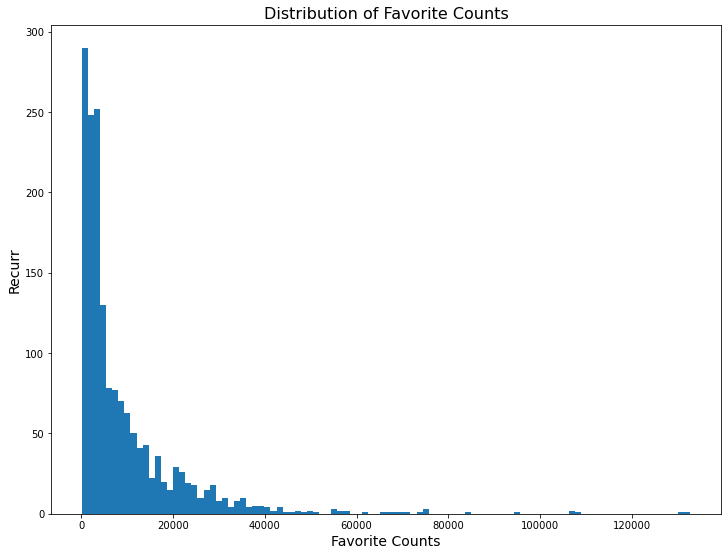

In [98]:
plt.figure(figsize = (12,9))
plt.hist(x = Master_ds.favorite_count, bins = 100)
plt.title('Distribution of Favorite Counts',fontsize=16)
plt.xlabel('Favorite Counts',fontsize=14)
plt.ylabel('Recurr',fontsize=14)
plt.show()

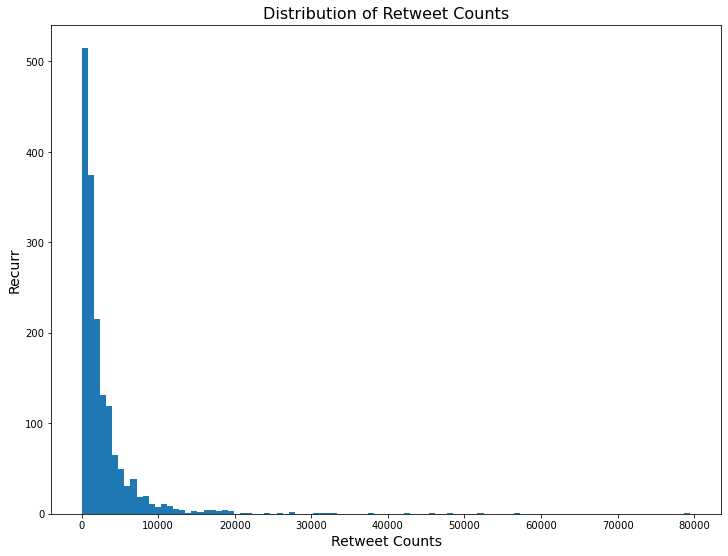

In [100]:
plt.figure(figsize = (12,9))
plt.hist(x = Master_ds.retweet_count, bins = 100)
plt.title('Distribution of Retweet Counts',fontsize=16)
plt.xlabel('Retweet Counts',fontsize=14)
plt.ylabel('Recurr',fontsize=14)
plt.show()

In [101]:
# checking the possibility of having the Retweet count greater than 
Master_ds[Master_ds['retweet_count'] > Master_ds['favorite_count']]

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,dog_name,dog_stage,favorite_count,retweet_count,...,img_num,predict_1,predict_1_conf,predict_1_dog,predict_2,predict_2_conf,predict_2_dog,predict_3,predict_3_conf,predict_3_dog


## Plot oservations :
 - the plotting of the both distributions of each ('favorite_count','retweet_count') .
   - showed that both distributions are right skewed . 
 - At first view the looks similar , but by presenting and checking the breaks on (X-axis of both plots) , we can find that favorite_count is higher than retweet_count


## Second Question :
 - through which twitter platform often 'WeRateDogs' acces their account ?

Twitter for iphone    1635
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64


Text(0.5, 1.0, 'The Distribution of platforms')

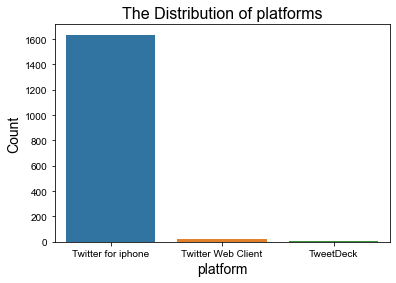

In [102]:
platform_used = Master_ds['source'].value_counts().index
print(Master_ds['source'].value_counts())
sns.countplot(x="source", data=Master_ds, order = platform_used)
sns.set(style="darkgrid")
plt.xlabel('platform', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of platforms',fontsize=16)

## Platform usage observations :

  - 98.13% of account access is through Twitter for iphone platform .
  - 1.32% of account access is through Twitter Web Client platform .
  - 0.54% of account access is through TweetDeck platform .

- from results we can say that @WeRateDogs are using Twitter for iphone as their main platform and channel .



## Third Question :
 - there is 13/10 rating given to the top 5 favorite tweets , and the top retweeted tweets .
 - Q : why ?

In [103]:
# Top 5 Favorite Tweets
Master_ds.sort_values('favorite_count', ascending=False)[['tweet_id','dog_name','dog_stage','favorite_count','retweet_count','rating_out_of_10']].head()

,tweet_id,dog_name,dog_stage,favorite_count,retweet_count,rating_out_of_10
306,822872901745569793,NaN,puppo,132810,48265,13
769,744234799360020481,NaN,doggo,131075,79515,13
58,879415818425184262,Duddles,,107956,45849,13
397,807106840509214720,Stephan,,107015,56625,13
108,866450705531457537,Jamesy,pupper,106827,32883,13


In [104]:
# Top 5 retweeted Tweets
Master_ds.sort_values('retweet_count', ascending=False)[['tweet_id','dog_name','dog_stage','favorite_count','retweet_count','rating_out_of_10']].head()

,tweet_id,dog_name,dog_stage,favorite_count,retweet_count,rating_out_of_10
769,744234799360020481,NaN,doggo,131075,79515,13
397,807106840509214720,Stephan,,107015,56625,13
804,739238157791694849,NaN,doggo,75163,52360,13
306,822872901745569793,NaN,puppo,132810,48265,13
58,879415818425184262,Duddles,,107956,45849,13


In [105]:
Master_ds.rating_out_of_10.value_counts(sort=True, ascending=False).head(5)

12    424
10    360
11    357
13    221
9     133
Name: rating_out_of_10, dtype: int64

## initial observations :
 - the rating of 13/10 came on the 4th place between other ratings and dogs !!.
 - this might point to a weak relationship between the 'rating_out_of_10 and both of ('favorite_count','retweet_count').

i will calculate the correlation Coeffient and plot the relationship so we can be assured of the weak relationship .

In [106]:
np.corrcoef(Master_ds.rating_out_of_10,Master_ds.favorite_count)[0][1]

0.37833239831826015

In [107]:
np.corrcoef(Master_ds.rating_out_of_10,Master_ds.retweet_count)[0][1]

0.2810847555849423

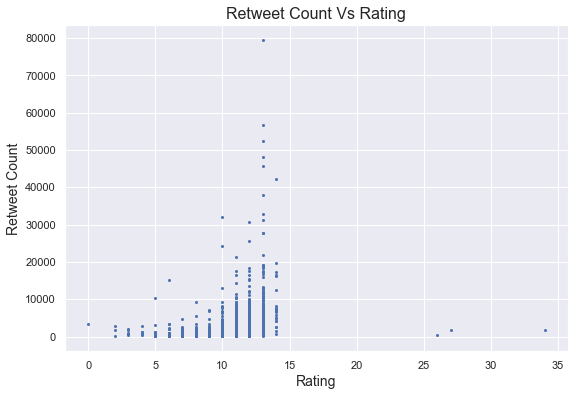

In [108]:
plt.figure(1, figsize = (9,6))
plt.plot(Master_ds.rating_out_of_10,Master_ds.retweet_count, marker='o', linestyle='', ms=2 )
plt.title('Retweet Count Vs Rating',fontsize=16)
plt.xlabel('Rating',fontsize=14)
plt.ylabel('Retweet Count',fontsize=14)
plt.show()

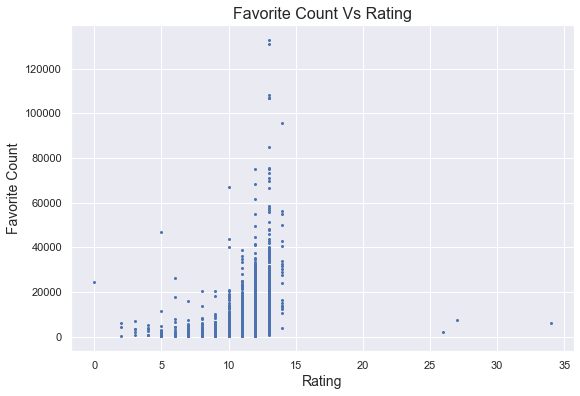

In [109]:
plt.figure(1, figsize = (9,6))
plt.plot(Master_ds.rating_out_of_10,Master_ds.favorite_count, marker='o', linestyle='', ms=2 )
plt.title('Favorite Count Vs Rating',fontsize=16)
plt.xlabel('Rating',fontsize=14)
plt.ylabel('Favorite Count',fontsize=14)
plt.show()

##Final Observations 

 - By plotting a scatter plots we have a strong evedince that the relationships between 'rating_out_of_10' and both ('favorite_count','retweet_count') is weak .